In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Customer_data.csv")
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


# DATA PREPROCESSING

In [3]:
#check structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [4]:
#get summary statistics
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [5]:
# no. of rows & columns
df.shape

(20000, 16)

In [6]:
#changing data type of Purchase date
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Loyalty Member               object
Product Type                 object
SKU                          object
Rating                        int64
Order Status                 object
Payment Method               object
Total Price                 float64
Unit Price                  float64
Quantity                      int64
Purchase Date        datetime64[ns]
Shipping Type                object
Add-ons Purchased            object
Add-on Total                float64
dtype: object

***Handle Missing Values***

In [7]:
df.isnull().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [8]:
#drop Add-ons Purchased column due to most null values
df.drop(columns = ['Add-ons Purchased'])
#fill gender with "Unknown"
df.fillna({'Gender': 'Unknown'}, inplace = True)

In [9]:
#change into lower case
columns_to_lower = ['Product Type', 'Payment Method', 'Order Status', 'Shipping Type', 'Add-ons Purchased']
df[columns_to_lower] = df[columns_to_lower].apply(lambda x: x.str.lower().str.strip())
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,smartphone,SKU1004,2,cancelled,credit card,5538.33,791.19,7,2024-03-20,standard,"accessory,accessory,accessory",40.21
1,1000,53,Male,No,tablet,SKU1002,3,completed,paypal,741.09,247.03,3,2024-04-20,overnight,impulse item,26.09
2,1002,41,Male,No,laptop,SKU1005,3,completed,credit card,1855.84,463.96,4,2023-10-17,express,NaN,0.00
3,1002,41,Male,Yes,smartphone,SKU1004,2,completed,cash,3164.76,791.19,4,2024-08-09,overnight,"impulse item,impulse item",60.16
4,1003,75,Male,Yes,smartphone,SKU1001,5,completed,cash,41.50,20.75,2,2024-05-21,express,accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,smartphone,SMP234,4,completed,bank transfer,6838.08,1139.68,6,2024-06-15,expedited,NaN,0.00
19996,19996,27,Female,Yes,laptop,LTP123,4,cancelled,credit card,2697.28,674.32,4,2024-07-18,standard,NaN,0.00
19997,19996,27,Female,No,headphones,HDP456,4,completed,bank transfer,1805.90,361.18,5,2024-08-26,standard,"impulse item, extended warranty, accessory",198.98
19998,19997,27,Male,No,headphones,HDP456,1,cancelled,bank transfer,2528.26,361.18,7,2024-01-06,expedited,"extended warranty, accessory",101.34


***UNIVARIATE ANALYSIS***

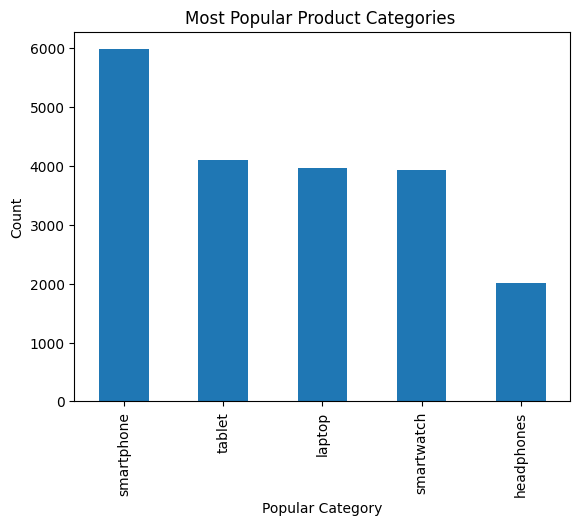

<Axes: title={'center': 'Most Popular Product Categories '}, xlabel='Popular Category', ylabel='Count'>

In [10]:
#bar chart to see popular products 
popular_categories = df['Product Type'].value_counts().plot(kind = 'bar')
plt.xlabel('Popular Category')
plt.ylabel('Count')
plt.title("Most Popular Product Categories ")
plt.show()
popular_categories

***BIVARIATE ANALYSIS***

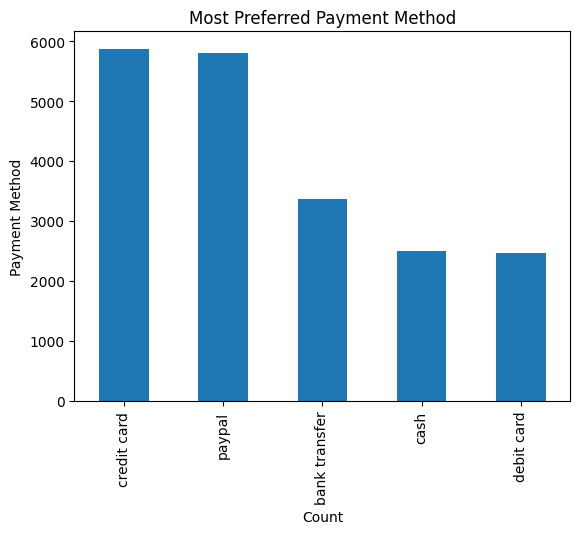

<Axes: title={'center': 'Most Preferred Payment Method'}, xlabel='Count', ylabel='Payment Method'>

In [11]:
#ANALYZE MOST PREFERRED PAYMENT METHOD
popular_pay_method = df['Payment Method'].value_counts().plot(kind='bar')
plt.title('Most Preferred Payment Method')
plt.ylabel('Payment Method')
plt.xlabel('Count')
plt.show()
popular_pay_method

 Peak Sales Month: May 2024 - $6,709,042.93
 Lowest Sales Month: September 2023 - $481,961.79


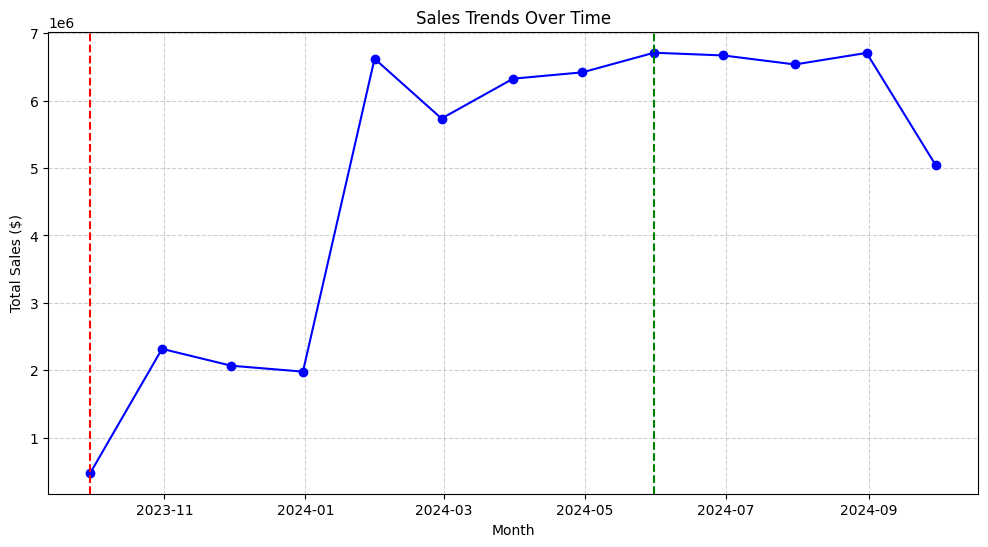

In [12]:
# Set 'Purchase Date' as the index
df.set_index('Purchase Date', inplace=True)

# Resample sales data by month
monthly_sales = df['Total Price'].resample('ME').sum()

# Identify peak and low-performing sales months
peak_month = monthly_sales.idxmax().strftime('%B %Y')
low_month = monthly_sales.idxmin().strftime('%B %Y')

print(f" Peak Sales Month: {peak_month} - ${monthly_sales.max():,.2f}")
print(f" Lowest Sales Month: {low_month} - ${monthly_sales.min():,.2f}")

# Plot Sales Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-', color='b', label="Total Sales")

# Highlight peak and low-performing months
plt.axvline(x=monthly_sales.idxmax(), color='g', linestyle='--', label=f'Peak: {peak_month}')
plt.axvline(x=monthly_sales.idxmin(), color='r', linestyle='--', label=f'Low: {low_month}')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Sales Trends Over Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

***ADVANCE VISUALIZATION***

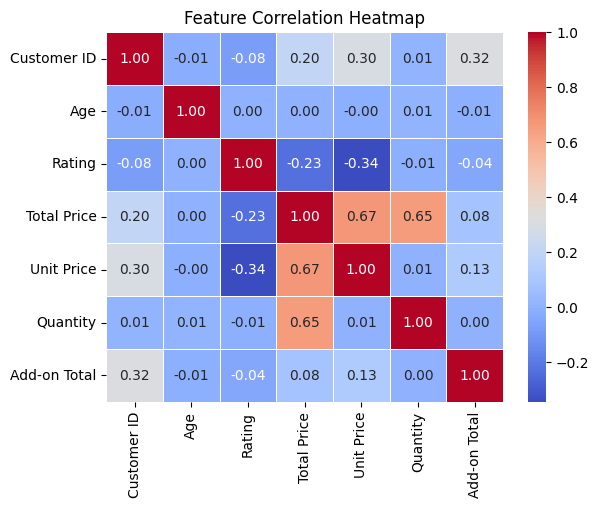

In [13]:
#heatmap to find relation btween numerical variables
num_cols = df.select_dtypes(include=['number'])
corr_matrix= num_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

***CUSTOMER SEGMENTATION***

In [14]:
#Segment customers based on spending behavior
completed_orders = df[df['Order Status'] == 'completed']
Total_completed_sales = completed_orders.groupby("Customer ID")['Total Price'].sum()
Total_sales = Total_completed_sales.sum()
sales_percentage = (Total_completed_sales/Total_sales) * 100

low_threshold = Total_completed_sales.quantile(0.25)
high_threshold = Total_completed_sales.quantile(0.75)

def categorize_spender(amount):
    if amount <= low_threshold:
        return 'Low Spender'
    elif amount <= high_threshold:
        return 'Medium Spender'
    else:
        return 'High Spender'

spending_categories = Total_completed_sales.apply(categorize_spender)

final_df = pd.DataFrame({
    'Total Spent': Total_completed_sales,
    'Percentage of Total Sales': sales_percentage,
    'Spender Category': spending_categories
})
final_df.head(3)

,Total Spent,Percentage of Total Sales,Spender Category
Customer ID,,,
1000,741.09,0.001738,Low Spender
1002,5020.60,0.011777,Medium Spender
1003,41.50,0.000097,Low Spender


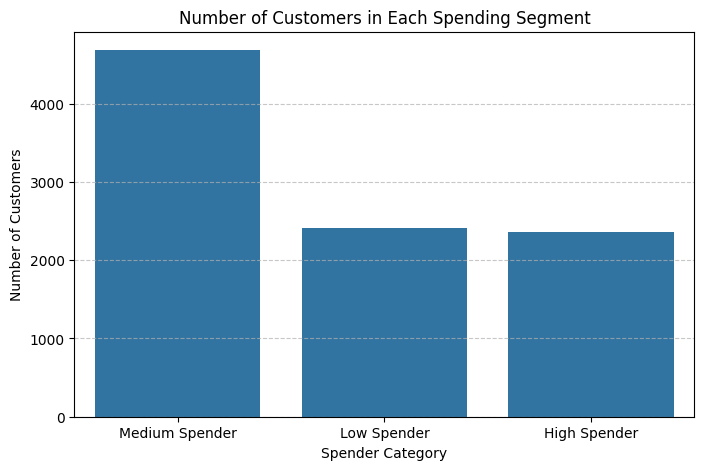

In [15]:
#bar plot for spending behavior
spender_counts = final_df['Spender Category'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=spender_counts.index, y=spender_counts.values)

plt.xlabel("Spender Category")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in Each Spending Segment")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
# Group by Customer ID and calculate total spending & purchase frequency
customer_stats = df.groupby('Customer ID').agg(
    Total_Spending=('Total Price', 'sum'),
    Purchase_Frequency=('Customer ID', 'count')
).reset_index()

# Display top spending customers
customer_stats.sort_values(by='Total_Spending', ascending=False).head(10)


,Customer ID,Total_Spending,Purchase_Frequency
9728,16357,34563.70,7
10049,16863,33035.92,5
8060,13813,31830.16,5
6475,11476,31077.61,5
7028,12276,30961.18,6
7935,13635,30260.36,5
7352,12749,29394.56,5
9087,15399,29084.88,3
7054,12319,27352.32,3
12133,19996,27296.78,6
